In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
df_pokemon = pd.read_csv('pokemon.csv')

df_pokemon_tipos_1 = pd.read_csv('pokemon_tipos_1.csv')

df_pokemon_tipos_2 = pd.read_csv('pokemon_tipos_2.csv')


In [4]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        800 non-null    int64  
 1   pokemon_nome             800 non-null    object 
 2   pokemon_tipo_1_id        800 non-null    int64  
 3   pokemon_tipo_2_id        414 non-null    float64
 4   pokemon_total            800 non-null    int64  
 5   pokemon_hp               800 non-null    int64  
 6   pokemon_attack           800 non-null    int64  
 7   pokemon_defense          800 non-null    int64  
 8   pokemon_ataque_especial  800 non-null    int64  
 9   pokemon_defesa_especial  800 non-null    int64  
 10  pokemon_velocidade       800 non-null    int64  
 11  pokemon_geracao          800 non-null    int64  
 12  pokemon_lendario         800 non-null    bool   
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 75.9+ KB


##### 1) Verifique se há a necessidade de realizar algum tratamento na base de dados, caso julgue necessário realize o tratamento e comente no código o porquê de estar realizando determinada técnica de limpeza.

In [5]:
# Ao analisar a df_pokemon.info(), identifiquei a falta de dados na coluna pokemons_tipo_2_id, como tenho interesse de fazer um merge, e utilizar 
# todas as informações disponiveis, fiz o tratamento, incluindo o número 0 a todas as colunas que não possuam informação, inclui o 0 também no DF tipo_2, 
# com o nome de Desc, assim, caso necessário, poderei identificar quais são os pokémons sem tipo_2_id, entendo que essa seja a melhor alternativa,
# até para uma manutenção, caso eu consiga os dados reais.

df_pokemon_tipos_2.loc[-1] = [0,'Desc']

df_pokemon['pokemon_tipo_2_id'].fillna(0, inplace= True) 

# Uma alternativa seria a função abaixo
# incluindo as informações da coluna pokemon_tipo_1_id na 2, quando esta esta vazia. Para isso utilizei a função
# modify_pokemon_type_2_NaN, adaptei ela de uma que o colega Diego utilizou. 

# def modify_pokemon_type_2_NaN(value):

#   if np.isnan(value['pokemon_tipo_2_id']): 

#      value['pokemon_tipo_2_id'] = value['pokemon_tipo_1_id']

#   return (value['pokemon_tipo_1_id'])

# df_pokemon['pokemon_tipo_2_id'] = df_pokemon[['pokemon_tipo_1_id','pokemon_tipo_2_id']].apply(modify_pokemon_type_2_NaN, axis= 1)


In [6]:
# Por ser um a base de dados pequena, optei por trabalhar com todos os dados disponibilizados, para isso, meu DF principal será a junção dos 3.

df_pokemon_complete = df_pokemon.merge(df_pokemon_tipos_1).merge(df_pokemon_tipos_2)

In [7]:
# Exibindo informações úteis antes do tratamento dos dados. O info() será útil para analizar os tratamentos necessários..

df_pokemon_complete.info()

df_pokemon_complete.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        800 non-null    int64  
 1   pokemon_nome             800 non-null    object 
 2   pokemon_tipo_1_id        800 non-null    int64  
 3   pokemon_tipo_2_id        800 non-null    float64
 4   pokemon_total            800 non-null    int64  
 5   pokemon_hp               800 non-null    int64  
 6   pokemon_attack           800 non-null    int64  
 7   pokemon_defense          800 non-null    int64  
 8   pokemon_ataque_especial  800 non-null    int64  
 9   pokemon_defesa_especial  800 non-null    int64  
 10  pokemon_velocidade       800 non-null    int64  
 11  pokemon_geracao          800 non-null    int64  
 12  pokemon_lendario         800 non-null    bool   
 13  pokemon_tipo_1_nome      800 non-null    object 
 14  pokemon_tipo_2_nome      8

Index(['#', 'pokemon_nome', 'pokemon_tipo_1_id', 'pokemon_tipo_2_id',
       'pokemon_total', 'pokemon_hp', 'pokemon_attack', 'pokemon_defense',
       'pokemon_ataque_especial', 'pokemon_defesa_especial',
       'pokemon_velocidade', 'pokemon_geracao', 'pokemon_lendario',
       'pokemon_tipo_1_nome', 'pokemon_tipo_2_nome'],
      dtype='object')

In [8]:
df_pokemon_complete.drop(['#'], axis=1, inplace=True)
# Identifiquei que a coluna "#" não me retornava nenhuma informação passivel útil. sua permanencia poderia mascarar dados duplicados, por isso exclui a coluna.

df_pokemon_complete['pokemon_tipo_2_id'] = df_pokemon_complete['pokemon_tipo_2_id'].astype(np.int16)
# Para facilitar as analises, transformei a coluna float64 em int16. Se fosse necessario,  poderia aplicar
# essa mesma técnica em todas as colunas int64, mas vendo que a tabela é pequena, +- 94 KB, entendo não ser necessário, 
# se ela tivesse MBs ou apresentasse lentidão na execusão, faria essa alteração.

df_pokemon_complete.drop_duplicates(keep='first', inplace=True)
# Não tenho interesse em realizar as analises com dados duplicados, dessa forma já realizo essa busca e limpeza dos duplicates.

In [9]:
#Exibindo informações úteis após o tratamento. O info será útil para identificar e visualizar as alterações.

df_pokemon_complete.info()

df_pokemon_complete.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pokemon_nome             800 non-null    object
 1   pokemon_tipo_1_id        800 non-null    int64 
 2   pokemon_tipo_2_id        800 non-null    int16 
 3   pokemon_total            800 non-null    int64 
 4   pokemon_hp               800 non-null    int64 
 5   pokemon_attack           800 non-null    int64 
 6   pokemon_defense          800 non-null    int64 
 7   pokemon_ataque_especial  800 non-null    int64 
 8   pokemon_defesa_especial  800 non-null    int64 
 9   pokemon_velocidade       800 non-null    int64 
 10  pokemon_geracao          800 non-null    int64 
 11  pokemon_lendario         800 non-null    bool  
 12  pokemon_tipo_1_nome      800 non-null    object
 13  pokemon_tipo_2_nome      800 non-null    object
dtypes: bool(1), int16(1), int64(9), object(3)


Index(['pokemon_nome', 'pokemon_tipo_1_id', 'pokemon_tipo_2_id',
       'pokemon_total', 'pokemon_hp', 'pokemon_attack', 'pokemon_defense',
       'pokemon_ataque_especial', 'pokemon_defesa_especial',
       'pokemon_velocidade', 'pokemon_geracao', 'pokemon_lendario',
       'pokemon_tipo_1_nome', 'pokemon_tipo_2_nome'],
      dtype='object')

In [10]:
# Para visualizar a tabela e o que são, na pratica, os dados, colunas e informações do DF após o tratamento.

df_pokemon_complete.head(1)

,pokemon_nome,pokemon_tipo_1_id,pokemon_tipo_2_id,pokemon_total,pokemon_hp,pokemon_attack,pokemon_defense,pokemon_ataque_especial,pokemon_defesa_especial,pokemon_velocidade,pokemon_geracao,pokemon_lendario,pokemon_tipo_1_nome,pokemon_tipo_2_nome
0,Bulbasaur,10,14,318,45,49,49,65,65,45,1,False,Grass,Poison


##### 2) Procure os pokémons do tipo Grass que possuem mais de 100 de ataque e são da geração 3.

In [11]:
# Estudei os dados, logo, sabendo a relação entre o tipo_1_id e o tipo_1_nome, irei farei a busca pelos ID, 
# com intuito de agilizar o processamento e usufruir das informações disponiveis. Grass == 10
# Filtrei os pokémons utilizando o query(), depois apresentei o resultado, utilizei a função to_string(index = False) para remover o index da saída.

df_pokemons_grass_attack_100_gen_3 = df_pokemon_complete.query('pokemon_tipo_1_id == 10 & pokemon_attack > 100 & pokemon_geracao == 3')

print(f"Os pokémons do tipo Grass, que possuem mais de 100 de ataque e são da geração 3: \n")

print(df_pokemons_grass_attack_100_gen_3[['pokemon_nome','pokemon_tipo_1_nome','pokemon_attack']].to_string(index = False))


Os pokémons do tipo Grass, que possuem mais de 100 de ataque e são da geração 3: 

         pokemon_nome pokemon_tipo_1_nome  pokemon_attack
SceptileMega Sceptile               Grass             110
             Cacturne               Grass             115
              Breloom               Grass             130


##### 3) Faça um comparativo entre os tipos de pokémon e as gerações, evidencie em cada tipo quais gerações possuem mais de 50 pokémons. Dica: use pivoteamento.

In [12]:
# Criei a função more_fidty_pokemons, que, ao utilizada no aggfunc, recebe pokemons_tipe_fire_grass e os valores da coluna informada. 
# Ela realiza a soma e retorna os valores que são maiores de 50.O pokemons_tipe_and_gen é um pivot_table, que traz uma tabela de fácil visualização, 
# evidenciando os tipos e as gerações de pokémons que possuem mais de 50 individuos.

def more_fifty_pokemons(values):
    sum_values = values.sum()
    if sum_values > 50:
        return sum_values

df_pokemons_tipe_and_gen = pd.pivot_table(df_pokemon_complete,
    index=['pokemon_tipo_1_nome'],  
    columns=['pokemon_geracao'],
    aggfunc={'pokemon_geracao': more_fifty_pokemons},
    fill_value =0
)

df_pokemons_tipe_and_gen['pokemon_geracao']

pokemon_geracao,3,4,5,6
pokemon_tipo_1_nome,,,,
Bug,0,0,90,0
Dark,0,0,65,0
Fairy,0,0,0,54
Ghost,0,0,0,60
Grass,0,60,75,0
Normal,54,72,95,0
Psychic,0,0,70,0
Rock,0,0,0,54
Water,81,52,90,0


##### 4) Faça um comparativo entre as gerações e a coluna de pokémons lendários para verificar quantos pokémons existem com velocidade acima de 85. Dica: use pivoteamento.

In [13]:
# Para buscar quantos pokémons existem com velocidade a cima de 85, optei por filtrar meu df antes de criar o pivot_table, pegando somente os que me interessa.
# Após, criei o pivot_table e apresentei a distribuição dos dados, apresentando a quantidade de pokémons com velocidade acima de 85, por geração e se é lendario ou não.

df_veloses_pokemon = df_pokemon_complete.query('pokemon_velocidade > 85')

df_comparection_gen_and_legendary = pd.pivot_table(df_veloses_pokemon,
    index=['pokemon_geracao'],  
    columns=['pokemon_lendario'],
    aggfunc={'pokemon_geracao': np.size},
)

print(df_comparection_gen_and_legendary['pokemon_geracao'])


pokemon_lendario  False  True
pokemon_geracao              
1                    49     5
2                    14     4
3                    25    15
4                    32    11
5                    37    15
6                    14     4


##### Adicional a questão 4:

In [14]:
# Este trecho de código traz uma comparação associada a questão 4, com a intenção de trazer uma conclusão sobre os dados apresentados, 
# é curta, mais serve de exemplo para demonstrar minha evolução na linguagem Python.

print('\nAdicionalmente ao desafio apresento a sequinte conclusão:')

count_pokemons_lendarios =  df_pokemon_complete.query('pokemon_lendario == True').count()['pokemon_lendario']
count_pokemons_not_lendarios =  df_pokemon_complete.query('pokemon_lendario == False').count()['pokemon_lendario']

lendario = 0
nao_lendario = 0

total_pokemons = count_pokemons_lendarios + count_pokemons_not_lendarios
total_pokemons_rapidos =  lendario + nao_lendario

percent_total = (total_pokemons_rapidos * 100) / total_pokemons

percent_lendarios = (lendario * 100) / count_pokemons_lendarios
percent_nao_lendarios = (nao_lendario * 100) / count_pokemons_not_lendarios

for i in df_veloses_pokemon['pokemon_lendario']:

    if i == True:
        lendario += 1
    else:
        nao_lendario += 1

total_pokemons = count_pokemons_lendarios + count_pokemons_not_lendarios
total_pokemons_rapidos =  lendario + nao_lendario

percent_total = (total_pokemons_rapidos * 100) / total_pokemons

percent_lendarios = (lendario * 100) / count_pokemons_lendarios
percent_nao_lendarios = (nao_lendario * 100) / count_pokemons_not_lendarios

print(f'\nO total de pokémons é de {total_pokemons}, sendo que {total_pokemons_rapidos} deles tem velocidade maior que 85.')

if lendario > nao_lendario:
    print(f'\n{lendario} são lendários e {nao_lendario} não lendários, existema mais pokémons lendários rápidos que não lendários.')
else:
    print(f'\n{nao_lendario} não são lendários e {lendario} lendários, existem mais pokémons não lendários rápidos que lendários.')

if percent_lendarios > percent_nao_lendarios:
    print(f'Porém, {round(percent_lendarios,2)} % dos lendários possuem velocidade superior a 85, quando {round(percent_nao_lendarios, 2)} % dos não lendarios possui tal velocidade.')
    print('\nConclusão: Os pokémons lendarios são, em sua maioria, mais rápidos que os não lendários.')
else:
    print(f'E {round(percent_nao_lendarios, 2)} % dos não lendários possuem velocidade superior a 85, quando {round(percent_lendarios,2)} % dos lendarios possui tal velocidade.')
    print('\nConclusão: Os não lendários são mais rapidos até proporcionalmente.')


Adicionalmente ao desafio apresento a sequinte conclusão:

O total de pokémons é de 800, sendo que 225 deles tem velocidade maior que 85.

171 não são lendários e 54 lendários, existem mais pokémons não lendários rápidos que lendários.
Porém, 83.08 % dos lendários possuem velocidade superior a 85, quando 23.27 % dos não lendarios possui tal velocidade.

Conclusão: Os pokémons lendarios são, em sua maioria, mais rápidos que os não lendários.


##### 5) Plote um gráfico mostrando o valor somado da coluna pokemon_total por tipo de pokemon, contando apenas os pokemons que possuem defesa menor que 50.

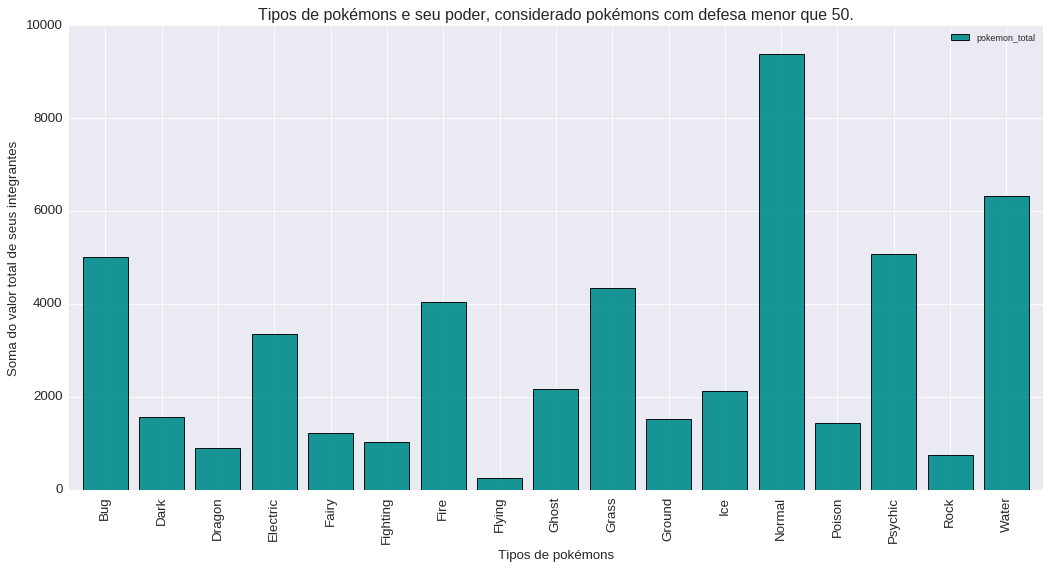

In [76]:
# Para o gráfico, optei por fazer uma query, filtrando os de defesa menor que 50, em seguida fiz um pivot_table para preparar os dados.
df_defense_less_than_50 = df_pokemon_complete.query('pokemon_defense < 50')

grafic_question_5 = pd.pivot_table(df_defense_less_than_50,
    index=['pokemon_tipo_1_nome'],  
    aggfunc={'pokemon_total': np.sum}
)

# para o gráfico, utilizei diversas configurações, como já repeti este exercício algumas vezes, sendo facil executar,
# procurei trabalhar nas config. da plotagem. Como style, cor, cor da borda, tamanhos de borda, letra, das colunas, etc.

plt.style.use("seaborn-darkgrid")
grafic_question_5.plot( kind='bar', color="darkcyan", ec= "k", fontsize= 12, figsize = (14,7),alpha= .9, width= .8, linewidth= 0.9)
plt.title("Tipos de pokémons e seu poder, considerado pokémons com defesa menor que 50.")
plt.xlabel("Tipos de pokémons")
plt.ylabel("Soma do valor total de seus integrantes")
plt.show()

##### 6) Faça uma comparação entre pokemons do tipo fire e do tipo grass evidenciando qual tem mais defesa no total e qual tem mais ataque no total.

In [16]:
# Iniciei realizando a filtragem dos dados, com o query, após realizei duas demonstrações, 1° uma Comparação simples, utilizando o pivot_table 
# para demonstrar a soma dos valores correspondentes a ataque e defesa. 2° Uma filtragem de dados, utilizando funções pandas, com a intenção de 
# apresentar os pokémons com mais ataque e mais defesa dentre os dois tipos.

df_fire_and_grass = df_pokemon_complete.query('pokemon_tipo_1_nome == "Fire" | pokemon_tipo_1_nome == "Grass"')

pokemons_tipe_fire_grass  = pd.pivot_table(df_fire_and_grass,
    index= ['pokemon_tipo_1_nome'],
    aggfunc= {'pokemon_attack': np.sum,'pokemon_defense': np.sum}
)

print('Compartivo entre pokémons do tipo Fire e Grass, apresentando a soma dos valores de ataque e defesa.')

display(pokemons_tipe_fire_grass)

Compartivo entre pokémons do tipo Fire e Grass, apresentando a soma dos valores de ataque e defesa.


,pokemon_attack,pokemon_defense
pokemon_tipo_1_nome,,
Fire,4408,3524
Grass,5125,4956


##### Parte 2, Questão 6

In [17]:
pokemon_max_attack = df_fire_and_grass.max()['pokemon_attack']

pokemon_attack = df_fire_and_grass[df_fire_and_grass['pokemon_attack'] == pokemon_max_attack]

pokemon_max_defense = df_fire_and_grass.max()['pokemon_defense']

pokemon_defense = df_fire_and_grass[df_fire_and_grass['pokemon_defense'] == pokemon_max_defense]

print(f"\nO pokémon que possui o maior ataque, dentre os dos tipos Fire e Grass é o:")

display(pokemon_attack[['pokemon_nome','pokemon_tipo_1_nome', 'pokemon_attack']])

print(f"\nO pokémon que possui o maior defesa, dentre os dos tipos Fire e Grass é o:")

display(pokemon_defense[['pokemon_nome','pokemon_tipo_1_nome', 'pokemon_defense']])


O pokémon que possui o maior ataque, dentre os dos tipos Fire e Grass é o:


,pokemon_nome,pokemon_tipo_1_nome,pokemon_attack
593,BlazikenMega Blaziken,Fire,160



O pokémon que possui o maior defesa, dentre os dos tipos Fire e Grass é o:


,pokemon_nome,pokemon_tipo_1_nome,pokemon_defense
117,Torkoal,Fire,140


##### 7) Um treinador pokémon quer escolher um pokémon para a batalha. Faça uma análise para indicar o melhor pokemon possível para o embate.
##### a) O adversário possui um pokémon do tipo Grass, e que esse tipo possui desvantagem sobre pokémons do tipo Bug, Fire, Flying, Ice e Poison.
##### b) O pokémon deve ser no máximo da geração 3
##### c) O ataque do pokémon deve ser menor ou igual a 100.
##### d) A defesa deve ser maior que 30.
##### e) O pokémon pode ter um tipo secundário que não influencia na regra a.
##### f) O pokémon não pode ser lendário.

In [82]:
# Sabendo que o tipo grass tem desvantagem ao combater com alguns tipos, vou fazer a busca por estes, aplicando após, as regras citadas.

coach_options_pokemon = df_pokemon_complete.query(
    'pokemon_tipo_1_nome == "Bug"'
    '| pokemon_tipo_1_nome == "Fire"'
    '| pokemon_tipo_1_nome == "Flying"'
    '| pokemon_tipo_1_nome == "Ice"'
    '| pokemon_tipo_1_nome == "Poison"'
)

coach_options_pokemon = coach_options_pokemon.query(
    'pokemon_geracao <= 3'
    '& pokemon_attack <= 100'
    '& pokemon_defense > 30'
    '& pokemon_lendario == False' 
)

# Busca pelo melhor pokémon, iniciando buscando o valor máximo do campo pokemon_total, e após busco ele no DF
coach_pokemon_max_value = coach_options_pokemon.max()['pokemon_total']

pokemon_coach_choice = coach_options_pokemon[coach_options_pokemon['pokemon_total'] == coach_pokemon_max_value]

# Buscando qual a melhor opção de pokémon que o adversário pode ter, me baseando no valor que consta na coluna pokemon_total.
options_adversary_pokemon = df_pokemon_complete.query('pokemon_tipo_1_id == 10')

best_adversary_pokemon = adversary_pokemon[adversary_pokemon['pokemon_total'] >  coach_pokemon_max_value]

# Calculo para saber qual a % de pokémos possiveis ao adversario, que minha indicação possui tendencia a vitória.
count_best_adversary = best_adversary_pokemon.count()['pokemon_nome']

count_options_adversary = options_adversary_pokemon.count()['pokemon_nome']

percent_victory = round((((count_best_adversary * 100) / count_options_adversary) - 100) *-1, 2)

print('Informações ')
display(options_adversary_pokemon[['pokemon_total','pokemon_hp','pokemon_attack','pokemon_defense','pokemon_ataque_especial','pokemon_defesa_especial','pokemon_velocidade']].describe())

print('\nMelhores pokémons possiveis do adversário: ')
display(best_adversary_pokemon[['pokemon_nome','pokemon_total','pokemon_hp','pokemon_attack','pokemon_defense','pokemon_ataque_especial','pokemon_defesa_especial','pokemon_velocidade']])

print('\nPokémon que eu indico ao treinador')
display(pokemon_coach_choice[['pokemon_nome','pokemon_tipo_1_nome','pokemon_total','pokemon_hp','pokemon_attack','pokemon_defense','pokemon_ataque_especial','pokemon_defesa_especial','pokemon_velocidade']])

print(f"Levando em consideração que pokémons do tipo Grass, possuem desvantagem sobre pokémons do tipo Bug, Fire, Flying, Ice e Poison, indico o pokémon, pois ele possui valores"
 f" superiores a média e ao 3° quartil, ou seja, possui números que indicam vitória contra {percent_victory} % dos pokémons do tipo Grass.")


Informações 


,pokemon_total,pokemon_hp,pokemon_attack,pokemon_defense,pokemon_ataque_especial,pokemon_defesa_especial,pokemon_velocidade
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571
std,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456
min,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000
25%,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000
50%,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000
75%,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000
max,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000



Melhores pokémons possiveis do adversário: 


,pokemon_nome,pokemon_total,pokemon_hp,pokemon_attack,pokemon_defense,pokemon_ataque_especial,pokemon_defesa_especial,pokemon_velocidade
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
87,ShayminLand Forme,600,100,100,100,100,100,100
457,ShayminSky Forme,600,100,103,75,120,75,127
550,SceptileMega Sceptile,630,70,110,75,145,85,145
589,Virizion,580,91,90,72,90,129,108
651,AbomasnowMega Abomasnow,594,90,132,105,132,105,30



Pokémon que eu indico ao treinador


,pokemon_nome,pokemon_tipo_1_nome,pokemon_total,pokemon_hp,pokemon_attack,pokemon_defense,pokemon_ataque_especial,pokemon_defesa_especial,pokemon_velocidade
511,Crobat,Poison,535,85,90,80,70,80,130


Levando em consideração que pokémons do tipo Grass, possuem desvantagem sobre pokémons do tipo Bug, Fire, Flying, Ice e Poison, indico o pokémon, pois ele possui valores superiores a média e ao 3° quartil, ou seja, possui números que indicam vitória contra 91.43 % dos pokémons do tipo Grass.
